In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [12]:
demo = pd.read_csv("Concrete_Data_Yeh.csv")
demo.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


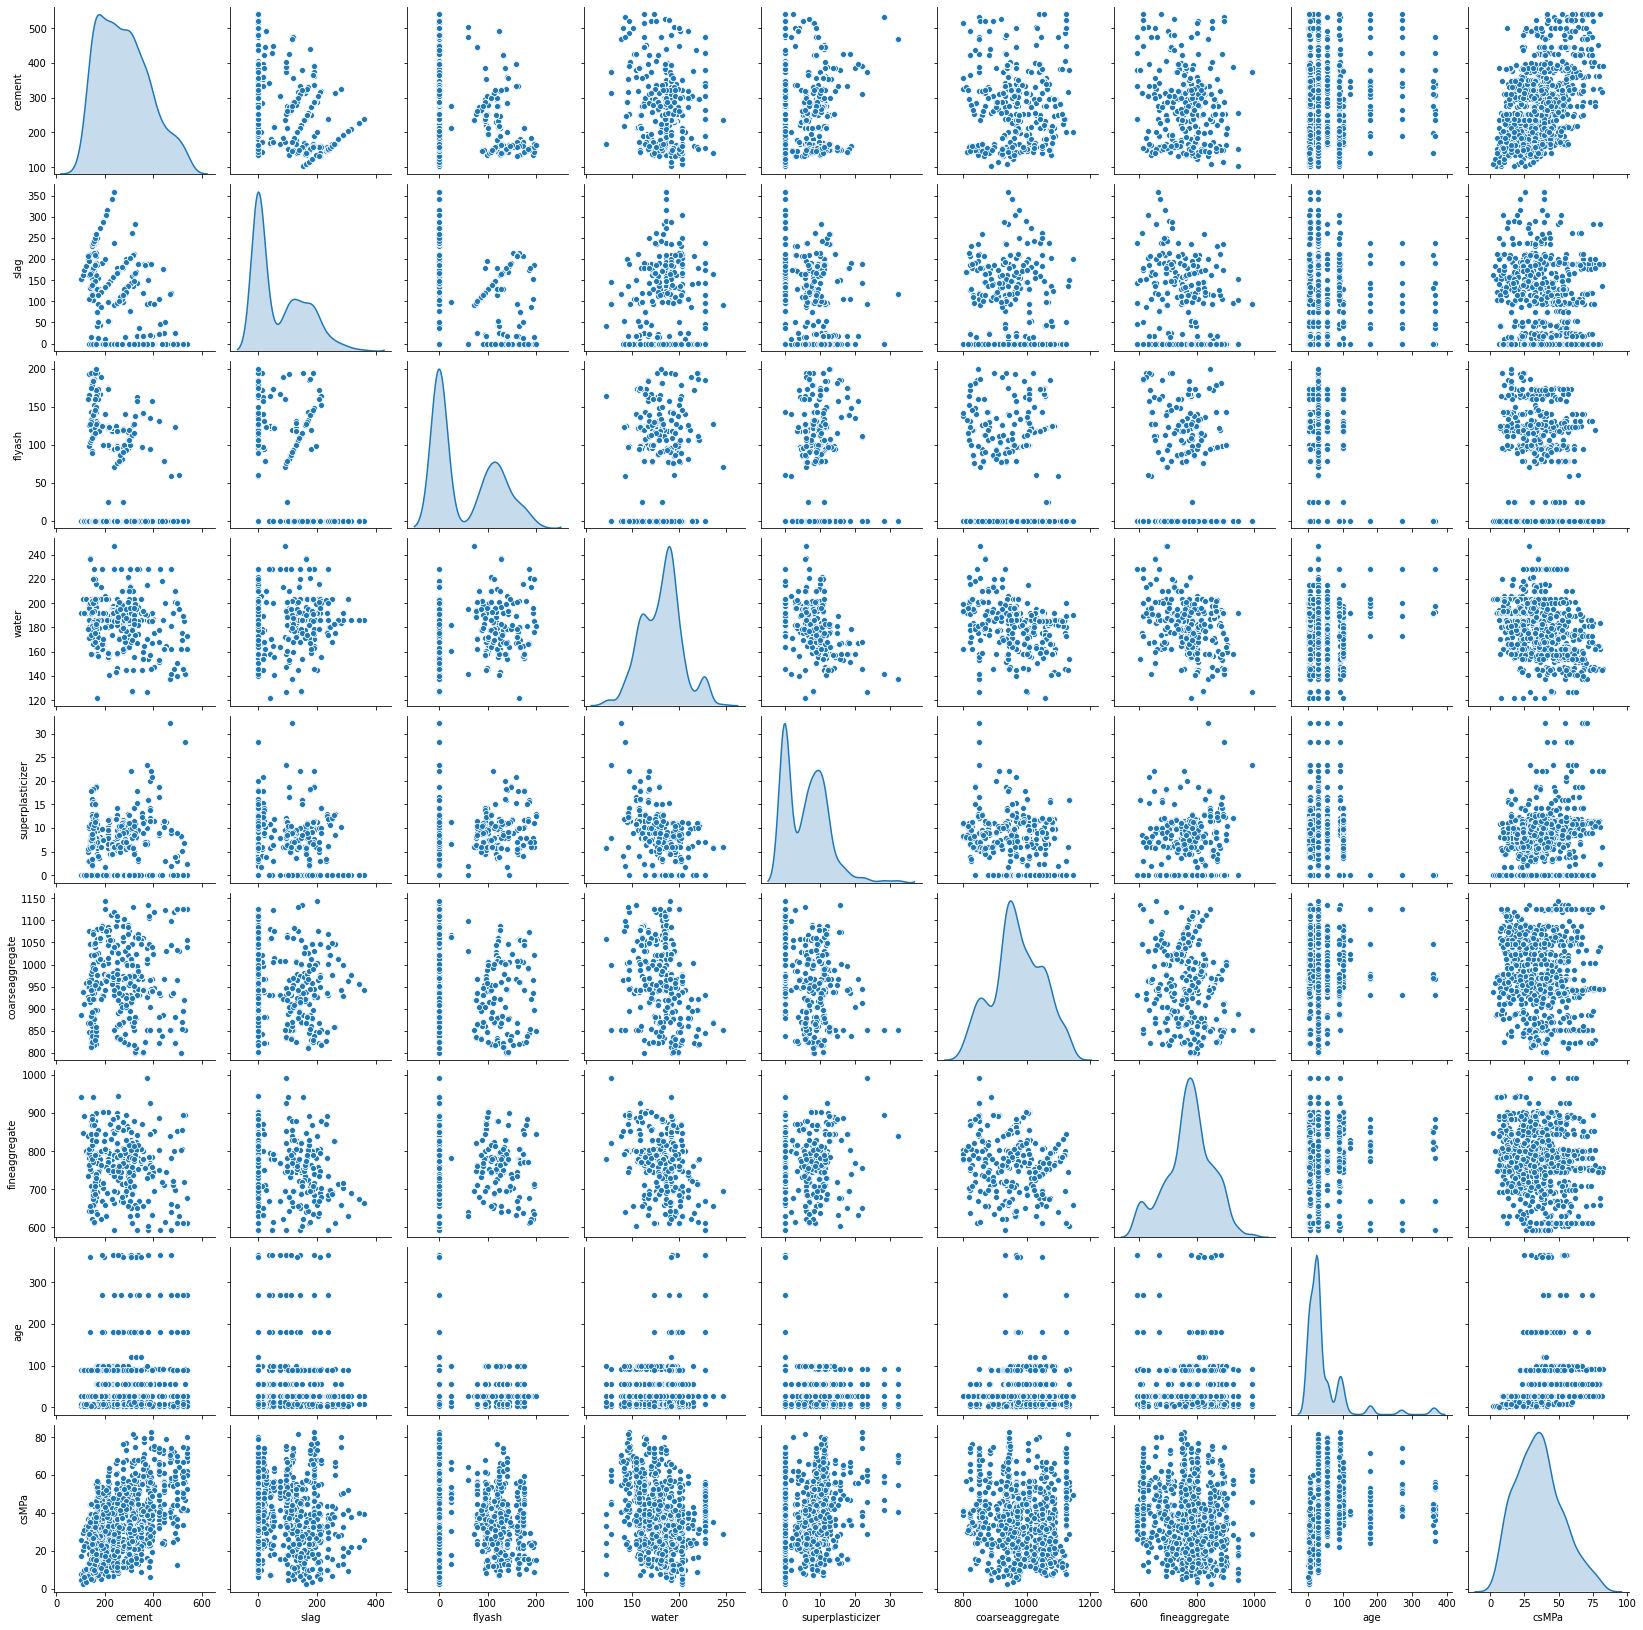

In [13]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.pairplot(demo,diag_kind='kde')

In [14]:
demo.skew()

cement              0.509481
slag                0.800717
flyash              0.537354
water               0.074628
superplasticizer    0.907203
coarseaggregate    -0.040220
fineaggregate      -0.253010
age                 3.269177
csMPa               0.416977
dtype: float64

<AxesSubplot:>

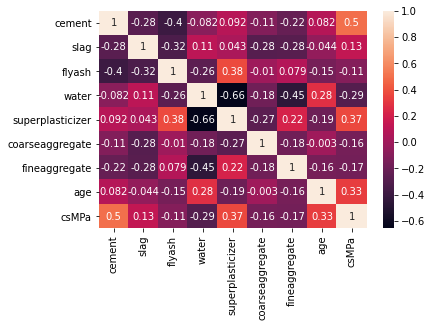

In [15]:
sns.heatmap(demo.corr(),annot=True)

In [16]:
#Basic Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
X=demo.drop('csMPa',axis=1)
y=demo[['csMPa']]
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .20,random_state=10)
lr = LinearRegression()
lr.fit(Xtrain,ytrain)
print("Training R2")
print(lr.score(Xtrain,ytrain))
print("Testing R2")
print(lr.score(Xtest,ytest))

Training R2
0.6210697467843866
Testing R2
0.5911879648718986


In [17]:
#Polynomial Features
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
X=demo.drop('csMPa',axis=1)
y=demo[['csMPa']]
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .20,random_state=10)
poly = PolynomialFeatures(degree=1)
sc=StandardScaler()
scaledXtrain = sc.fit_transform(Xtrain)
scaledXtest = sc.transform(Xtest)
polyXtrain = poly.fit_transform(scaledXtrain)
polyXtest = poly.transform(scaledXtest)
lr = LinearRegression()
lr.fit(polyXtrain,ytrain)
print("Training R2")
print(lr.score(polyXtrain,ytrain))
print("Testing R2")
print(lr.score(polyXtest,ytest))

Training R2
0.6210697467843866
Testing R2
0.5911879648718987


In [18]:
#With Pipeline
from sklearn.pipeline import Pipeline
X=demo.drop('csMPa',axis=1)
y=demo[['csMPa']]
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .20,random_state=10)
pipe = Pipeline((
("sc",StandardScaler()),
("poly",PolynomialFeatures(degree=1)),
("lr", LinearRegression()),
))
pipe.fit(Xtrain,ytrain)
print("Training R2")
print(pipe.score(Xtrain,ytrain))
print("Testing R2")
print(pipe.score(Xtest,ytest))

Training R2
0.6210697467843866
Testing R2
0.5911879648718987


In [19]:
#With Pipeline and PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer
X=demo.drop('csMPa',axis=1)
y=demo[['csMPa']]
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .20,random_state=10)
pipe = Pipeline((
("pt",PowerTransformer()),
("poly",PolynomialFeatures(degree=1)),
("lr", LinearRegression()),
))
pipe.fit(Xtrain,ytrain)
print("Training R2")
print(pipe.score(Xtrain,ytrain))
print("Testing R2")
print(pipe.score(Xtest,ytest))

Training R2
0.8080840977706969
Testing R2
0.7997646551542748


In [20]:
#With Pipeline (Transformation Pipeline Only, model separate)
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
X=demo.drop('csMPa',axis=1)
y=demo[['csMPa']]
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .20,random_state=10)
pipe = Pipeline((
("sc",StandardScaler()),
("poly",PolynomialFeatures(degree=1)),
("pca",PCA())
))
preparedtrain = pipe.fit_transform(Xtrain)
preparedtest = pipe.transform(Xtest)
lr=LinearRegression()
lr.fit(preparedtrain,ytrain)
print("Training R2")
print(lr.score(preparedtrain,ytrain))
print("Testing R2")
print(lr.score(preparedtest,ytest))

Training R2
0.6210697467843866
Testing R2
0.5911879648718987


In [21]:
#To be Used for Final Testing
X=demo.drop('csMPa',axis=1)
y=demo[['csMPa']]
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .20,random_state=42)

In [22]:
#K-Fold CV
import numpy as np
from sklearn.model_selection import cross_val_score
#Basic Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
lr = LinearRegression()
scoresdt = cross_val_score(lr,Xtrain,ytrain,cv=10)
print(scoresdt)
print("Average R2")
print(np.mean(scoresdt))
print("SD of accuracy")
print(np.std(scoresdt))
print("Coefficient of Variation")
print(np.std(scoresdt)/np.mean(scoresdt))

[0.50796416 0.59612247 0.57315431 0.47321291 0.67726559 0.72443785
 0.67198417 0.56585279 0.56345404 0.5407373 ]
Average R2
0.5894185601991602
SD of accuracy
0.07537360243190003
Coefficient of Variation
0.12787789106340974


In [28]:
#With Pipeline (Transformation Pipeline Only, model separate)
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
pipe = Pipeline((
("sc",StandardScaler()),
("poly",PolynomialFeatures(degree=1)),
("pt",PowerTransformer()),
("pca",PCA())
))
preparedtrain = pipe.fit_transform(Xtrain)
preparedtest = pipe.transform(Xtest)
lr=LinearRegression()
scoresdt = cross_val_score(lr,preparedtrain,ytrain,cv=10)
print(scoresdt)
print("Average R2")
print(np.mean(scoresdt))
print("SD of accuracy")
print(np.std(scoresdt))
print("Coefficient of Variation")
print(np.std(scoresdt)/np.mean(scoresdt))

[0.77365024 0.78099561 0.80337823 0.75390135 0.85986501 0.83368849
 0.83501914 0.80908602 0.80253152 0.79254915]
Average R2
0.8044664760119871
SD of accuracy
0.030136413512333506
Coefficient of Variation
0.0374613665217349


/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [38]:
#With Pipeline (Transformation Pipeline Only, model separate)
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA
pipe = Pipeline((
("pt",PowerTransformer()),
))
preparedtrain = pipe.fit_transform(Xtrain)
preparedtest = pipe.transform(Xtest)
lr=DecisionTreeRegressor(max_depth=18)
scoresdt = cross_val_score(lr,preparedtrain,ytrain,cv=10)
print(scoresdt)
print("Average R2")
print(np.mean(scoresdt))
print("SD of accuracy")
print(np.std(scoresdt))
print("Coefficient of Variation")
print(np.std(scoresdt)/np.mean(scoresdt))

[0.81774684 0.85031068 0.89397567 0.78818598 0.8828801  0.82190143
 0.8782594  0.79101504 0.79541008 0.77266618]
Average R2
0.8292351400091075
SD of accuracy
0.041943331899123054
Coefficient of Variation
0.05058074588911221


In [44]:
import warnings
warnings.filterwarnings('ignore')

#With Pipeline (Transformation Pipeline Only, model separate)
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
pipe = Pipeline((
("pt",PowerTransformer()),
))
preparedtrain = pipe.fit_transform(Xtrain)
preparedtest = pipe.transform(Xtest)
lr=RandomForestRegressor(n_estimators=500)
scoresdt = cross_val_score(lr,preparedtrain,ytrain,cv=10)
print(scoresdt)
print("Average R2")
print(np.mean(scoresdt))
print("SD of accuracy")
print(np.std(scoresdt))

[0.88223644 0.91246161 0.95145472 0.8808511  0.93960102 0.88014636
 0.91798031 0.90458444 0.9090791  0.90453742]
Average R2
0.9082932515084858
SD of accuracy
0.02281898030493642


Automatically created module for IPython interactive environment


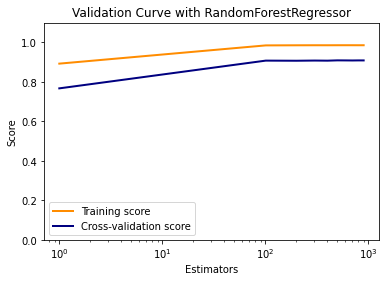

In [58]:
#Create a validation curve for RandomForest Regressor on this dataset
print(__doc__)
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve
param_range = np.arange(1,1000,100)
train_scores, test_scores = validation_curve(
    RandomForestRegressor(), Xtrain, ytrain, param_name="n_estimators", param_range=param_range, scoring = 'r2',n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with RandomForestRegressor")
plt.xlabel("Estimators")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [59]:
#Hyperparameter Tuning with Pipeline
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
pipe = Pipeline((
("sc",StandardScaler()),
("poly",PolynomialFeatures()),
("pt",PowerTransformer()),
("pca",PCA()),
("xb",RandomForestRegressor())
))
param_grid = {
    'poly__degree' : [2,3],
    'pca__n_components' : [30,40],
    'xb__n_estimators' : [10,20,30,40,50]
}
search = GridSearchCV(pipe,param_grid,cv=5)
search.fit(Xtrain,ytrain)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=(('sc',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('poly',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=True,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('pt',
                                        PowerTransformer(copy=True,
                                                         method='yeo-johnson',
                                                         standardize=True)),
                                       ('pca

In [63]:
search.best_params_

{'pca__n_components': 40, 'poly__degree': 3, 'xb__n_estimators': 50}

In [64]:
#Performance on the CV set
search.best_score_

0.8001679424217409

In [65]:
#Performance on the test set
search.score(Xtest,ytest)

0.8165464548694665

In [66]:
search.cv_results_

{'mean_fit_time': array([0.89569964, 0.98959069, 1.17123833, 1.18739338, 1.17376904,
        1.27598786, 1.52289057, 1.6150311 , 1.64415646, 1.71915851,
        0.67712073, 0.83112798, 0.97116652, 1.17498631, 1.27437201,
        1.76812634, 1.97209797, 2.2552743 , 2.25778913, 2.70547662]),
 'std_fit_time': array([0.2380368 , 0.14228987, 0.16664751, 0.10696272, 0.23035274,
        0.21609262, 0.15380033, 0.1211287 , 0.14254053, 0.11631506,
        0.10538032, 0.11011273, 0.1279031 , 0.24122873, 0.22102962,
        0.19703645, 0.19957104, 0.1490834 , 0.26087994, 0.21897198]),
 'mean_score_time': array([0.00794053, 0.00875502, 0.0088079 , 0.01126127, 0.01245651,
        0.02961469, 0.01754642, 0.02613764, 0.03364296, 0.02508121,
        0.0172801 , 0.02195897, 0.01590376, 0.01475391, 0.02274256,
        0.0273262 , 0.02351756, 0.02295094, 0.02798834, 0.05905614]),
 'std_score_time': array([0.00136736, 0.00047444, 0.00091085, 0.00110234, 0.00062599,
        0.00794539, 0.00102213, 0.010679

In [69]:
import warnings
warnings.filterwarnings('ignore')
#Model Comparison
from sklearn.tree import DecisionTreeRegressor
from sklearn import model_selection
X=demo.drop('csMPa',axis=1)
y=demo[['csMPa']]
lr = LinearRegression()
dt = DecisionTreeRegressor()
xb = RandomForestRegressor(n_estimators=100)
models = []
models.append(('Linear Regression',lr))
models.append(('Decision Tree Regression',dt))
models.append(('Random Forest Regression',xb))

Linear Regression: 0.569504 (0.075374)
Decision Tree Regression: 0.811150 (0.044832)
Random Forest Regression: 0.909822 (0.023360)


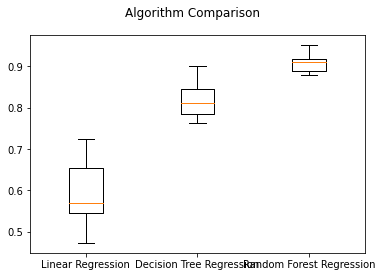

In [71]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10,random_state=10)
	cv_results = model_selection.cross_val_score(model, Xtrain, ytrain, cv=kfold)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, np.median(cv_results), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()